# DS7333 Bank Data Prediction Case Study
#### 02/28/2021
#### Tom Gianelle, Yang Zhang and Michael Weatherford

# Table of contents
1. [Data](#data)
2. [Explortory Data Analysis](#eda)
3. [Baseline Analysis](#model1)
4. [Data Rebalance](#balance)
4. [Random Forest](#rf)
5. [Xgboost](#xgb)
6. [SVM](#svm)

## Data <a name="data"></a>

In [1]:
import pandas as pd
import xgboost as xgb

# required libraries
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
# ignore warnings
warnings.filterwarnings("ignore")

# For multiple line outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [2]:
train = pd.read_csv("./case_8.csv")
target = train['target']
train.drop(['target'],inplace=True, axis=1)

In [3]:
train

,ID,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1.630686,7.464411,C,4.145098,9.191265,2.436402,2.483921,2.301630,9.031859,...,6.822439,3.549938,0.598896,AF,1.672658,3.239542,1.957825,0,1.925763,1.739389
2,5,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1.630686,7.464411,C,4.145098,8.742359,2.436402,2.483921,1.496569,9.031859,...,6.822439,3.549938,0.919812,Z,1.672658,3.239542,2.030373,0,1.925763,1.739389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114316,228708,1.630686,7.464411,C,4.145098,8.742359,2.436402,2.483921,1.496569,9.031859,...,6.822439,3.549938,0.919812,AL,1.672658,3.239542,2.030373,0,1.925763,1.739389
114317,228710,1.630686,7.464411,C,4.145098,8.742359,2.436402,2.483921,1.496569,9.031859,...,6.822439,3.549938,0.919812,E,1.672658,3.239542,2.030373,1,1.925763,1.739389
114318,228711,1.630686,7.464411,C,4.145098,10.069277,2.436402,2.483921,0.323324,9.031859,...,6.822439,3.549938,0.156764,Q,1.672658,3.239542,2.417606,2,1.925763,1.739389
114319,228712,1.630686,7.464411,C,4.145098,10.106144,2.436402,2.483921,0.309226,9.031859,...,6.822439,3.549938,0.490658,BW,1.672658,3.239542,3.526650,0,1.925763,1.739389


In [4]:
train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114321 entries, 0 to 114320
Data columns (total 132 columns):
 #   Column  Dtype  
---  ------  -----  
 0   ID      int64  
 1   v1      float64
 2   v2      float64
 3   v3      object 
 4   v4      float64
 5   v5      float64
 6   v6      float64
 7   v7      float64
 8   v8      float64
 9   v9      float64
 10  v10     float64
 11  v11     float64
 12  v12     float64
 13  v13     float64
 14  v14     float64
 15  v15     float64
 16  v16     float64
 17  v17     float64
 18  v18     float64
 19  v19     float64
 20  v20     float64
 21  v21     float64
 22  v22     object 
 23  v23     float64
 24  v24     object 
 25  v25     float64
 26  v26     float64
 27  v27     float64
 28  v28     float64
 29  v29     float64
 30  v30     object 
 31  v31     object 
 32  v32     float64
 33  v33     float64
 34  v34     float64
 35  v35     float64
 36  v36     float64
 37  v37     float64
 38  v38     int64  
 39  v39     float64
 40  v

In [5]:
allObjs = train.select_dtypes(include='object').columns
allObjs

Index(['v3', 'v22', 'v24', 'v30', 'v31', 'v47', 'v52', 'v56', 'v66', 'v71',
       'v74', 'v75', 'v79', 'v91', 'v107', 'v110', 'v112', 'v113', 'v125'],
      dtype='object')

In [6]:
train.v22

0          XDX
1          GUV
2           FQ
3         ACUE
4          HIT
          ... 
114316    ADQC
114317     XRT
114318    AGTG
114319     SGB
114320     QKI
Name: v22, Length: 114321, dtype: object

In [7]:
case8_nominal = train.loc[:, (train.dtypes == object)]
uniqueThreshold = 25

#Delete categorical columns with > 25 unique values (Each unique value becomes a column during one-hot encoding)
oneHotUniqueValueCounts = train[case8_nominal.columns].apply(lambda x: x.nunique())
oneHotUniqueValueCols = oneHotUniqueValueCounts[oneHotUniqueValueCounts >= uniqueThreshold].index
train.drop(oneHotUniqueValueCols, axis=1, inplace=True) 

#Review dataset contents one hot high unique value drops
print('*********After: Removing columns with >= uniqueThreshold unique values***********')
train.info(verbose=False)
print ('\r\nColumns Deleted: ', len(oneHotUniqueValueCols))

*********After: Removing columns with >= uniqueThreshold unique values***********
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114321 entries, 0 to 114320
Columns: 128 entries, ID to v131
dtypes: float64(108), int64(5), object(15)
memory usage: 111.6+ MB

Columns Deleted:  4


In [8]:
train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114321 entries, 0 to 114320
Data columns (total 128 columns):
 #   Column  Dtype  
---  ------  -----  
 0   ID      int64  
 1   v1      float64
 2   v2      float64
 3   v3      object 
 4   v4      float64
 5   v5      float64
 6   v6      float64
 7   v7      float64
 8   v8      float64
 9   v9      float64
 10  v10     float64
 11  v11     float64
 12  v12     float64
 13  v13     float64
 14  v14     float64
 15  v15     float64
 16  v16     float64
 17  v17     float64
 18  v18     float64
 19  v19     float64
 20  v20     float64
 21  v21     float64
 22  v23     float64
 23  v24     object 
 24  v25     float64
 25  v26     float64
 26  v27     float64
 27  v28     float64
 28  v29     float64
 29  v30     object 
 30  v31     object 
 31  v32     float64
 32  v33     float64
 33  v34     float64
 34  v35     float64
 35  v36     float64
 36  v37     float64
 37  v38     int64  
 38  v39     float64
 39  v40     float64
 40  v

In [9]:
#Isolate remaining categorical variables
begColumnCt = len(train.columns)

#one hot encode categorical variables
train_onehot = pd.get_dummies(data=train,drop_first=True)

In [10]:
#Determine change in column count
endColumnCt = len(train_onehot.columns)
columnsAdded = endColumnCt - begColumnCt


#Review dataset contents one hot high unique value drops
print('Columns To One-Hot Encode: ', len(case8_nominal.columns))
print('\r\n*********After: Adding New Columns Via One-Hot Encoding*************************')
train.info(verbose=False)
print ('\r\nNew Columns Created Via One-Hot Encoding: ', columnsAdded)

Columns To One-Hot Encode:  19

*********After: Adding New Columns Via One-Hot Encoding*************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114321 entries, 0 to 114320
Columns: 128 entries, ID to v131
dtypes: float64(108), int64(5), object(15)
memory usage: 111.6+ MB

New Columns Created Via One-Hot Encoding:  86


In [11]:
train_onehot.shape

(114321, 214)

In [24]:
#Location where the new school datasets will be created.
outputDir = 'C:/Users/taniat470s/Desktop/SMU_course/DS7333/CaseStudy8/'
train_onehot.to_csv(outputDir + 'case8_onehotcoded_4ML.csv', sep=',', index=False)
target.to_csv(outputDir + 'case8_target_4ML.csv', sep=',', index=False)

In [12]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

## EDA <a name="eda"></a>

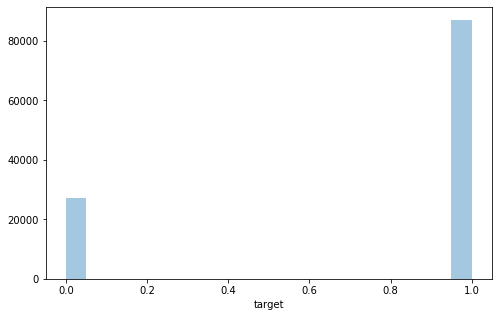

In [28]:
# Histogram of target variable: critial_temp
f, ax = plt.subplots(figsize=(8, 5))
sns.distplot(target, bins=20, kde=False,ax=ax)
plt.show()

In [37]:
df = pd.DataFrame(target.value_counts())
df

,target
1,87021
0,27300


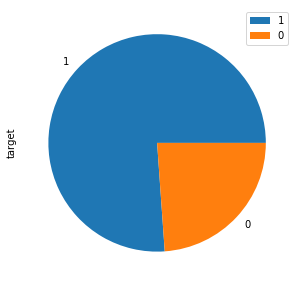

In [39]:
plot = df.plot.pie(y='target', figsize=(5, 5))

In [30]:
train_onehot.columns(verbose=True)

Index(['ID', 'v1', 'v2', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10',
       ...
       'v112_M', 'v112_N', 'v112_O', 'v112_P', 'v112_Q', 'v112_R', 'v112_S',
       'v112_T', 'v112_U', 'v112_V'],
      dtype='object', length=214)

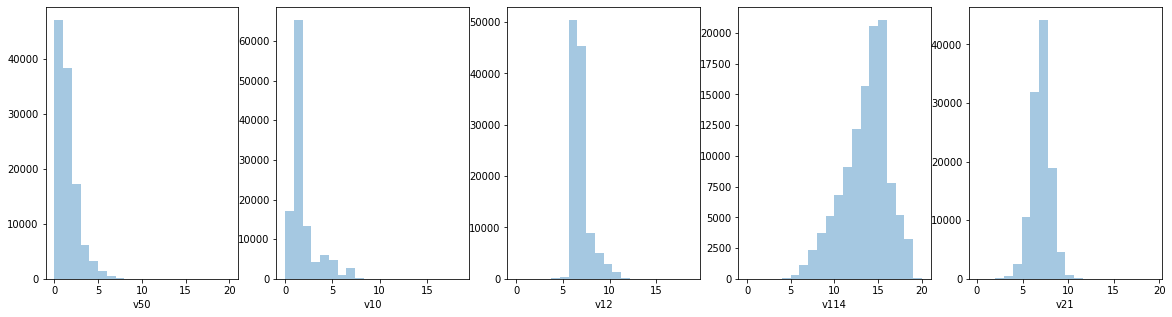

In [47]:
f, ax = plt.subplots(1,5,figsize=(20, 5))
sns.distplot(train_onehot["v50"], bins=20, kde=False, ax=ax[0])
sns.distplot(train["v10"], bins=20, kde=False, ax=ax[1])
sns.distplot(train["v12"], bins=20, kde=False, ax=ax[2])
sns.distplot(train["v114"], bins=20, kde=False, ax=ax[3])
sns.distplot(train["v21"], bins=20, kde=False, ax=ax[4])
plt.show()

In [44]:
Comb = pd.concat([train_onehot.reset_index(drop=True), target], axis=1)

In [45]:
Comb_sample_sub = Comb.sample(1000)

,v50,v10,v12,v114,v21,v40,v14,v34,v62
47876,0.726287,0.765864,6.340849,14.966806,6.401018,8.623110,10.760797,6.860725,1
40886,0.517937,0.503282,6.222984,10.218511,6.584040,13.961363,10.478942,3.317575,1
105431,0.871542,1.312910,6.690323,11.485383,6.812060,12.928876,11.636387,4.485851,1
32795,0.591300,1.575492,6.984004,11.634679,6.835845,12.638014,11.812943,4.836926,1
34296,0.425501,0.503282,6.256245,12.811857,6.241495,11.268359,10.115592,5.020687,1
...,...,...,...,...,...,...,...,...,...
41648,3.161911,2.100656,6.444673,12.964070,7.315006,12.439765,12.434004,5.296557,1
112053,0.873011,1.028446,6.480888,15.378443,5.920337,8.089139,10.627713,7.365545,2
30783,1.184065,5.229759,9.454360,15.375074,9.317927,8.247595,15.512416,9.939374,0
41652,2.319712,3.150985,7.519079,13.800262,6.469829,10.996310,12.190028,6.877938,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023A81DE3788>,
      dtype=object)

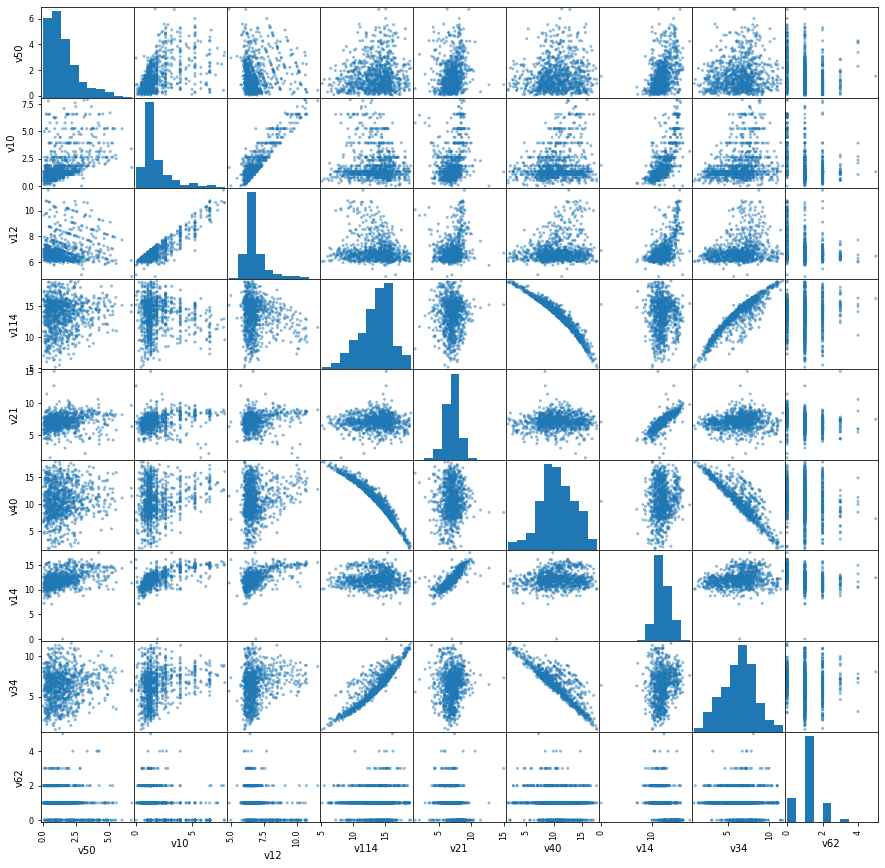

In [80]:
# create a new dataframe 
train_pick = train_onehot[['v50', 'v10', 'v12',
                     'v114','v21', 'v40','v14','v34','v62']]

train_pick.sample(1000)
train_sample_sub = train_pick.sample(1000)

pd.plotting.scatter_matrix(train_sample_sub, 
                           figsize=(15,15))

plt.show()

In [82]:
comb_pick = Comb_sample_sub[['v50', 'v10', 'v12',
                     'v114','v21', 'v40','v14','v34','v62']]

#pd.plotting.scatter_matrix(comb_pick, c=Comb_sample_sub['target'],
#                           figsize=(15,15))

#plt.show()

In [46]:
target_pick = Comb_sample_sub[['target']]
target_pick

,target
48708,0
6179,1
76509,0
37130,1
86772,1
...,...
108932,1
65996,0
83449,1
44099,1


In [47]:
Comb_sample_sub.drop(['ID'],inplace=True, axis=1)

In [49]:
Comb_sample_sub.drop(['target'],inplace=True, axis=1)

In [48]:
Comb_sample_sub

,v1,v2,v4,v5,v6,v7,v8,v9,v10,v11,...,v112_N,v112_O,v112_P,v112_Q,v112_R,v112_S,v112_T,v112_U,v112_V,target
48708,1.630686,7.464411,4.145098,8.742359,2.436402,2.483921,1.496569,9.031859,6.542670,15.447413,...,0,0,0,0,0,0,0,1,0,0
6179,1.630686,7.464411,4.145098,8.742359,2.436402,2.483921,1.496569,9.031859,2.078774,15.447413,...,0,0,0,0,0,0,0,0,0,1
76509,1.630686,7.464411,4.145098,8.742359,2.436402,2.483921,1.496569,9.031859,1.816193,15.447413,...,0,0,0,0,0,0,0,0,0,0
37130,1.630686,7.464411,4.145098,8.742359,2.436402,2.483921,1.496569,9.031859,1.291029,15.447413,...,0,0,0,0,0,0,0,0,0,1
86772,1.630686,7.464411,4.145098,8.742359,2.436402,2.483921,1.496569,9.031859,1.050328,15.447413,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108932,1.488602,7.036057,3.351334,5.151311,1.662941,2.641931,0.214162,10.830450,1.291028,14.977444,...,0,0,0,0,0,0,0,0,0,1
65996,1.128478,5.005012,3.945093,9.636314,3.797178,2.295082,3.046114,10.198675,1.050329,15.474256,...,0,0,0,0,0,0,0,0,0,0
83449,2.534247,3.276618,3.083671,9.058582,3.224447,2.455216,1.870070,8.208955,1.291028,15.381008,...,0,0,0,0,0,0,0,0,0,1
44099,3.166259,2.659329,1.763453,7.226868,2.216789,2.705787,1.882472,11.578948,1.553611,13.836699,...,0,0,0,0,0,0,0,0,0,1


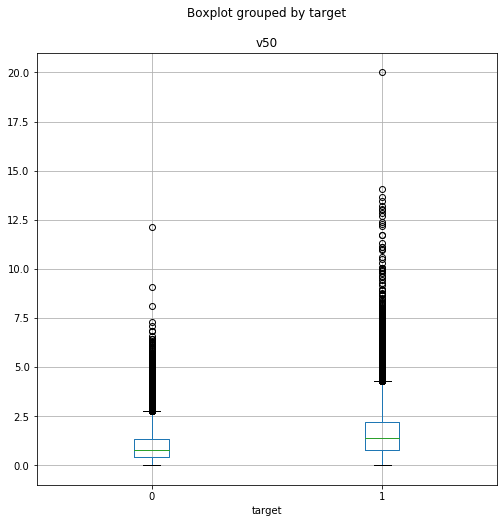

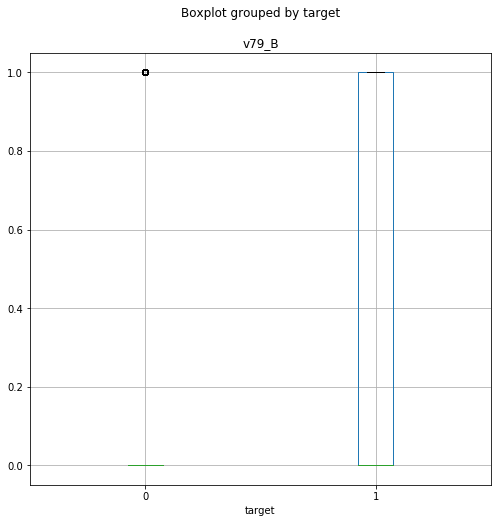

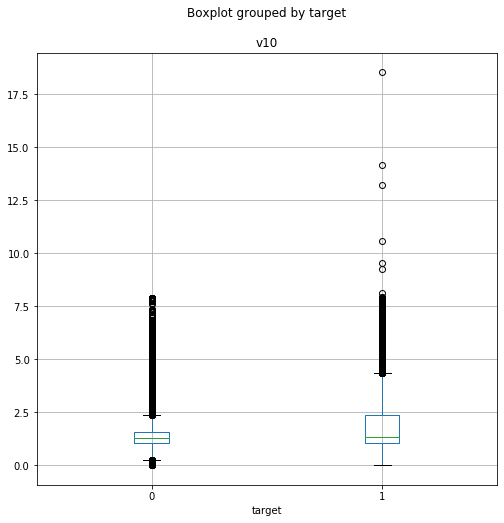

In [59]:
# Here we will run a boxplot 
Comb.boxplot(column='v50', by='target', figsize=(8,8))
plt.show()

Comb.boxplot(column='v79_B', by='target', figsize=(8,8))
plt.show()

Comb.boxplot(column='v10', by='target', figsize=(8,8))
plt.show()

## Feature Importance

In [55]:
train_onehot.drop(['ID'],inplace=True, axis=1)

In [42]:
from sklearn.ensemble import ExtraTreesRegressor
forest = ExtraTreesRegressor()

forest.fit(train_onehot, target)
importances = forest.feature_importances_

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

<Figure size 720x3240 with 0 Axes>

<BarContainer object of 214 artists>

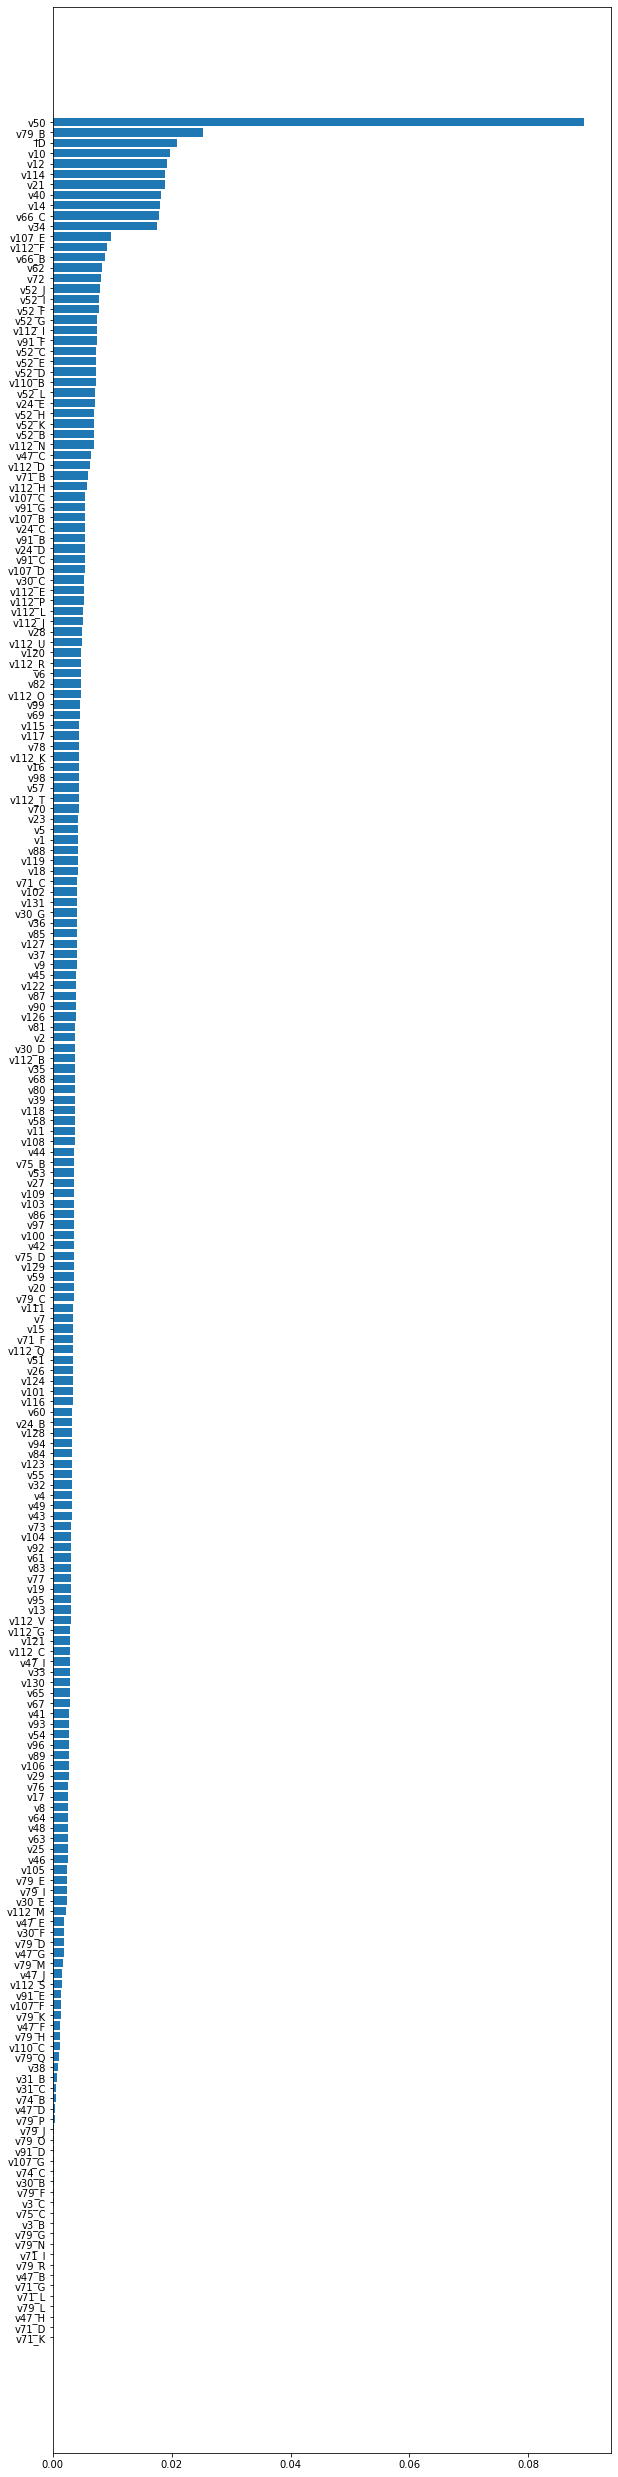

In [46]:
sorted_idx = forest.feature_importances_.argsort()

plt.figure(figsize=(10,45))
plt.barh(train_onehot.columns[sorted_idx], importances[sorted_idx])

## Modeling Baseline <a name="model1"></a>

### Xgboost

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_onehot, target, test_size=0.33, random_state=42)

In [14]:
xgtrain = xgb.DMatrix(X_train.values, y_train.values)
xgtest = xgb.DMatrix(X_test.values, y_test.values)

In [15]:
print('Fit the model...')
# XGBoost params:
xgboost_params = { 
   "objective": "binary:logistic",
   "booster": "gbtree",
   "eval_metric": "logloss",
   "eta": 0.01, 
   "subsample": 0.5,
   "colsample_bytree": 0.5,
   "max_depth": 3
}
boost_round = 50
clf = xgb.train(xgboost_params,xgtrain,num_boost_round=boost_round,verbose_eval=True,maximize=False)

Fit the model...


In [16]:
#Make predict
print('Predict...')
test_preds = clf.predict(xgtest, ntree_limit=clf.best_iteration)
# Save results

Predict...


In [17]:
import numpy as np
from sklearn.metrics import log_loss, accuracy_score
print(log_loss(y_test,test_preds))
print(accuracy_score(y_test,np.rint(test_preds)))

0.5849582258070197
0.7633727402852144


In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            specificity    = cf[0,0] / sum(cf[0,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nSpecificity={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,specificity,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

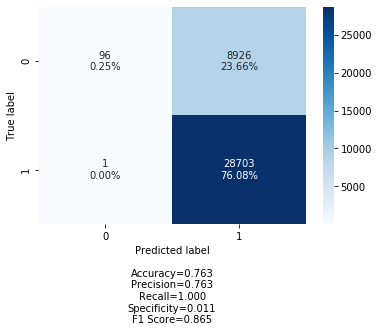

In [22]:
from sklearn import metrics as mt
# Confusion Matrix from model using original data
conf = mt.confusion_matrix(y_test,np.rint(test_preds))

make_confusion_matrix(conf)

### SVM

In [67]:
%%time
#####################################
# WARNING THIS TAKES AN HOUR TO RUN #
# Using LinearSVM for faster returns#
#####################################
from sklearn.svm import SVC
svm = SVC(verbose=True)
svm.fit(X_train, y_train)
print("done")

[LibSVM]done
Wall time: 2h 23min 49s


In [68]:
svm.predict(X_test)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,svm.predict(X_test))

NameError: name 'svm' is not defined

In [70]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50)
rf.fit(X_train, y_train)
preds = rf.predict_proba(X_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [71]:
print(log_loss(y_test,preds[:,1])) # each column is class probability, 
print(accuracy_score(y_test,np.rint(preds[:,1])))

0.4940061223354364
0.7791973705137041


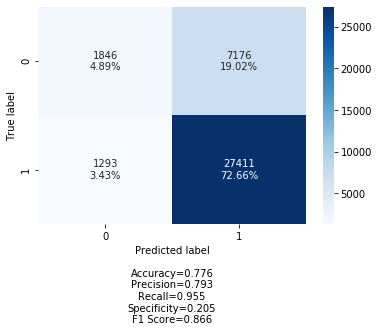

In [26]:
from sklearn import metrics as mt
# Confusion Matrix from model using original data
conf = mt.confusion_matrix(y_test,np.rint(preds[:,1]))
make_confusion_matrix(conf)

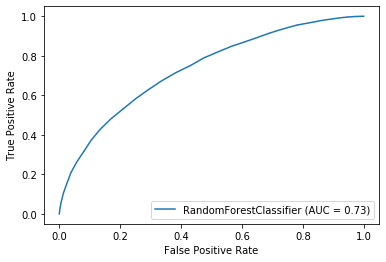

In [72]:
from sklearn import datasets, metrics
metrics.plot_roc_curve(rf, X_test, y_test) 

## Baseline Linear SVM

In [38]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
#X, y = make_classification(n_features=4, random_state=0)
clf = make_pipeline(StandardScaler(),
                    LinearSVC(random_state=0, tol=1e-5))

In [39]:
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearsvc',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='squared_hinge', max_iter=1000,
                           multi_class='ovr', penalty='l2', random_state=0,
                           tol=1e-05, verbose=0))],
         verbose=False)

In [40]:
pred_lsvm = clf.predict(X_test)

In [41]:
accuracy_score(y_test,pred_lsvm)

0.7652017176483062

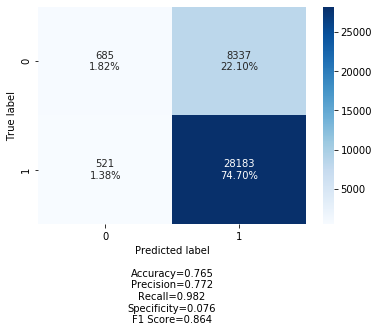

In [42]:
conf = mt.confusion_matrix(y_test,pred_lsvm)
make_confusion_matrix(conf)

## Data Re-Balance using SMOTE <a name="balance"></a>

In [12]:
from imblearn.over_sampling import SMOTE

# Oversample using SMOTE
# Make all classes the same size as the majority class.
# WARNING - This can exponentially increase the size of the input dataset.
sm = SMOTE(sampling_strategy='not majority')
X_sm, y_sm = sm.fit_sample(train_onehot, pd.DataFrame(target))

In [13]:
from sklearn.model_selection import train_test_split
Xsm_train, Xsm_test, ysm_train, ysm_test = train_test_split(X_sm, y_sm, test_size=0.33, random_state=42)

In [14]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50)
rf.fit(Xsm_train, ysm_train)
preds = rf.predict_proba(Xsm_test)

RandomForestClassifier(n_estimators=50)

In [15]:
from sklearn.metrics import log_loss, accuracy_score
print(log_loss(ysm_test,preds[:,1])) # each column is class probability, 
print(accuracy_score(ysm_test,np.rint(preds[:,1])))

0.35626895161794236
0.8464672493644879


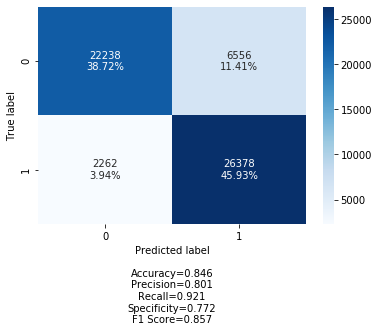

In [18]:
from sklearn import metrics as mt
conf = mt.confusion_matrix(ysm_test,np.rint(preds[:,1]))

make_confusion_matrix(conf)

In [19]:
#Location where the new school datasets will be created.
outputDir = 'C:/Users/taniat470s/Desktop/SMU_course/DS7333/CaseStudy8/'
X_sm.to_csv(outputDir + 'case8_Smote_onehotcoded_4ML.csv', sep=',', index=False)
y_sm.to_csv(outputDir + 'case8_Smote_target_4ML.csv', sep=',', index=False)

In [17]:
y_sm

,target
0,1
1,1
2,1
3,1
4,1
...,...
174037,0
174038,0
174039,0
174040,0


In [18]:
y_sm_val = y_sm['target']

In [22]:
y_sm.shape


(174042, 1)

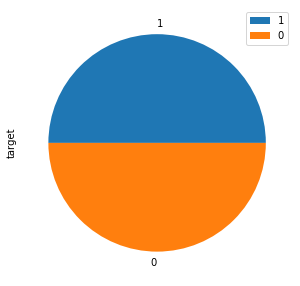

In [19]:
df_sm = pd.DataFrame(y_sm_val.value_counts())
plot = df_sm.plot.pie(y='target', figsize=(5, 5))

In [23]:
X_sm.shape

(174042, 214)

## Random Forest Tuning <a name="rf"></a>

In [90]:
%%time
#Create a Linear Regression object and perform a grid search to find the best parameters
from sklearn.ensemble import RandomForestClassifier

reg = RandomForestClassifier()
parameters = {'bootstrap': [True, False],
               'max_depth': [10, 50, 100, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 10],
               'n_estimators': [130, 230]}

# parameters = {'bootstrap': [True, False],
#  'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

Wall time: 0 ns


In [91]:
from sklearn.model_selection import RandomizedSearchCV
regGridSearch = RandomizedSearchCV(estimator = reg, param_distributions = parameters, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

### To save running time we use a subset of data to do a random grid searching

In [58]:
Comb_sample_sub.drop(['ID'],inplace=True, axis=1)
Comb_sample_sub.drop(['target'],inplace=True, axis=1)

In [92]:
regGridSearch.fit(Comb_sample_sub, target_pick)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 17.4min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [93]:
regGridSearch.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Tuned parameter shown below

In [94]:
#regEstimator = regGridSearch.best_estimator_
regEstimator = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=230,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
# regEstimator = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
#                        criterion='gini', max_depth=20, max_features='sqrt',
#                        max_leaf_nodes=None, max_samples=None,
#                        min_impurity_decrease=0.0, min_impurity_split=None,
#                        min_samples_leaf=4, min_samples_split=10,
#                        min_weight_fraction_leaf=0.0, n_estimators=1000,
#                        n_jobs=None, oob_score=False, random_state=None,
#                        verbose=0, warm_start=False)
regEstimator.fit(Comb_sample_sub, target_pick)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Modeling with tuned parameters

In [32]:
X_train.drop(['ID'],inplace=True, axis=1)

In [27]:
regEstimator = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=230,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [74]:
regEstimator.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=230,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [76]:
preds_grd = regEstimator.predict_proba(X_test)
print(log_loss(y_test,preds_grd[:,1])) # each column is class probability, 
print(accuracy_score(y_test,np.rint(preds_grd[:,1])))

0.4753978646460035
0.7798335365530403


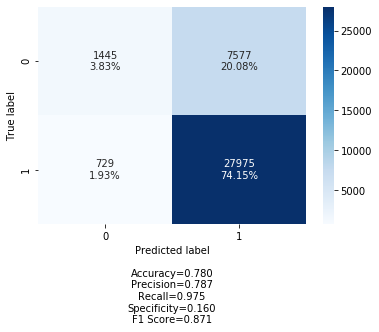

In [79]:
from sklearn import metrics as mt
# Confusion Matrix from model using original data
conf = mt.confusion_matrix(y_test,np.rint(preds_grd[:,1]))
make_confusion_matrix(conf)

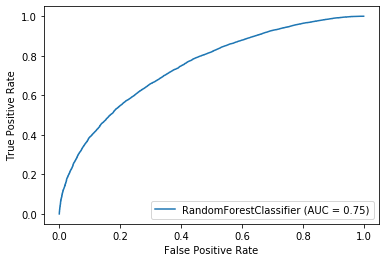

In [77]:
from sklearn import datasets, metrics
metrics.plot_roc_curve(regEstimator, X_test, y_test) 

### Fine tuning with SMOTE data

In [14]:
%%time
#Create a Linear Regression object and perform a grid search to find the best parameters
from sklearn.ensemble import RandomForestClassifier

reg = RandomForestClassifier(n_jobs=4)
parameters = {'bootstrap': [True, False],
               'max_depth': [10, 50, 100, None],
               'max_features': ['auto', 'sqrt','log2',100,200],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 10],
               'n_estimators': [130, 230, 330]}

from sklearn.model_selection import RandomizedSearchCV
regGridSearch = RandomizedSearchCV(estimator = reg, param_distributions = parameters, scoring=['neg_log_loss','accuracy'],n_iter = 10, cv = 3, verbose=2, random_state=42, refit='neg_log_loss')

Wall time: 0 ns


In [17]:
%%time
regGridSearch.fit(Xsm_train, ysm_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_estimators=230, min_samples_split=10, min_samples_leaf=4, max_features=100, max_depth=None, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=230, min_samples_split=10, min_samples_leaf=4, max_features=100, max_depth=None, bootstrap=True, total= 8.5min
[CV] n_estimators=230, min_samples_split=10, min_samples_leaf=4, max_features=100, max_depth=None, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  8.5min remaining:    0.0s


[CV]  n_estimators=230, min_samples_split=10, min_samples_leaf=4, max_features=100, max_depth=None, bootstrap=True, total= 7.2min
[CV] n_estimators=230, min_samples_split=10, min_samples_leaf=4, max_features=100, max_depth=None, bootstrap=True 
[CV]  n_estimators=230, min_samples_split=10, min_samples_leaf=4, max_features=100, max_depth=None, bootstrap=True, total= 7.2min
[CV] n_estimators=330, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=330, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, total= 2.2min
[CV] n_estimators=330, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=330, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, total= 2.2min
[CV] n_estimators=330, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=3

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 112.2min finished


Wall time: 2h 5min 25s


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=4),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 50, 100, None],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         100, 200],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 10],
                                        'n_estimators': [130, 230, 330]},
                   random_state=42, refit='neg_log_loss',
                   scoring=['neg_log_loss', 'accuracy'], verbose=2)

In [25]:
regGridSearch.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=50, n_estimators=230,
                       n_jobs=4)

In [22]:
regEstimator = regGridSearch.best_estimator_
regEstimator.fit(Xsm_train, ysm_train)

RandomForestClassifier(bootstrap=False, max_depth=50, n_estimators=230,
                       n_jobs=4)

### Random Forest model results

In [23]:
preds_grd = regEstimator.predict_proba(Xsm_test)
print(log_loss(ysm_test,preds_grd[:,1])) # each column is class probability, 
print(accuracy_score(ysm_test,np.rint(preds_grd[:,1])))

0.3373293910967793
0.853692934498729


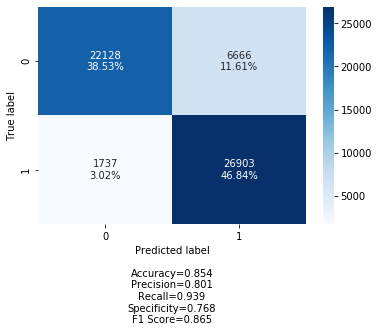

In [24]:
from sklearn import metrics as mt
# Confusion Matrix from model using original data
conf = mt.confusion_matrix(ysm_test,np.rint(preds_grd[:,1]))
make_confusion_matrix(conf)

## XGBoost Tuning <a name="xgb"></a>

In [38]:
trainSM = X_sm
targetSM = y_sm

from sklearn.model_selection import train_test_split
X_trainSM, X_testSM, y_trainSM, y_testSM = train_test_split(trainSM, targetSM, test_size=0.33, random_state=42)

In [39]:
xgtrainSM = xgb.DMatrix(X_trainSM.values, y_trainSM.values)
xgtestSM = xgb.DMatrix(X_testSM.values, y_testSM.values)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_onehot, target, test_size=0.33, random_state=42)

In [29]:
xgtrain = xgb.DMatrix(X_train.values, y_train.values)
xgtest = xgb.DMatrix(X_test.values, y_test.values)

# Hypertune

In [84]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

# Define initial best params and logloss
min_logloss = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        xgtrainSM,
        num_boost_round=100,
        seed=42,
        nfold=3,
        metrics={'logloss'},
        early_stopping_rounds=10
    )
    # Update best logloss
    mean_logloss = cv_results['test-logloss-mean'].min()
    boost_rounds = cv_results['test-logloss-mean'].argmin()
    print("\tlogloss {} for {} rounds".format(mean_logloss, boost_rounds))
    if mean_logloss < min_logloss:
        min_logloss = mean_logloss
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, logloss: {}".format(best_params[0], best_params[1], min_logloss))

CV with max_depth=9, min_child_weight=5
	logloss 0.3596796 for 99 rounds
CV with max_depth=9, min_child_weight=6
	logloss 0.35972600000000005 for 99 rounds
CV with max_depth=9, min_child_weight=7
	logloss 0.35993900000000006 for 99 rounds
CV with max_depth=10, min_child_weight=5
	logloss 0.3564064 for 99 rounds
CV with max_depth=10, min_child_weight=6
	logloss 0.35661660000000006 for 99 rounds
CV with max_depth=10, min_child_weight=7
	logloss 0.3566076 for 99 rounds
CV with max_depth=11, min_child_weight=5
	logloss 0.35385419999999995 for 99 rounds
CV with max_depth=11, min_child_weight=6
	logloss 0.3541868 for 99 rounds
CV with max_depth=11, min_child_weight=7
	logloss 0.354179 for 99 rounds
Best params: 11, 5, logloss: 0.35385419999999995


In [85]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

min_logloss = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        xgtrainSM,
        num_boost_round=100,
        seed=42,
        nfold=5,
        metrics={'logloss'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_logloss = cv_results['test-logloss-mean'].min()
    boost_rounds = cv_results['test-logloss-mean'].argmin()
    print("\tlogloss {} for {} rounds".format(mean_logloss, boost_rounds))
    if mean_logloss < min_logloss:
        min_logloss = mean_logloss
        best_params = (subsample,colsample)
print("Best params: {}, {}, logloss: {}".format(best_params[0], best_params[1], min_logloss))

CV with subsample=1.0, colsample=1.0
	logloss 0.34115019999999996 for 99 rounds
CV with subsample=1.0, colsample=0.9
	logloss 0.3410748 for 99 rounds
CV with subsample=1.0, colsample=0.8
	logloss 0.341455 for 99 rounds
CV with subsample=1.0, colsample=0.7
	logloss 0.34287900000000004 for 99 rounds
CV with subsample=0.9, colsample=1.0
	logloss 0.34049080000000004 for 99 rounds
CV with subsample=0.9, colsample=0.9
	logloss 0.34048880000000004 for 99 rounds
CV with subsample=0.9, colsample=0.8
	logloss 0.3414154 for 99 rounds
CV with subsample=0.9, colsample=0.7
	logloss 0.34339519999999996 for 99 rounds
CV with subsample=0.8, colsample=1.0
	logloss 0.3403122 for 99 rounds
CV with subsample=0.8, colsample=0.9
	logloss 0.3407676 for 99 rounds
CV with subsample=0.8, colsample=0.8
	logloss 0.3417374 for 99 rounds
CV with subsample=0.8, colsample=0.7
	logloss 0.3440408 for 99 rounds
CV with subsample=0.7, colsample=1.0
	logloss 0.341164 for 99 rounds
CV with subsample=0.7, colsample=0.9
	logl

In [97]:

# This can take some time…
min_logloss = float("Inf")
best_params = None
for eta in [.05, .03, .01]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    cv_results = xgb.cv(
        params,
        xgtrainSM,
        num_boost_round=100,
        seed=42,
        nfold=3,
        metrics=['logloss'],
        early_stopping_rounds=10
    )
    # Update best score
    mean_logloss = cv_results['test-logloss-mean'].min()
    boost_rounds = cv_results['test-logloss-mean'].argmin()
    print("\tlogloss {} for {} rounds\n".format(mean_logloss, boost_rounds))
    if mean_logloss < min_logloss:
        min_logloss = mean_logloss
        best_params = eta
print("Best params: {}, logloss: {}".format(best_params, min_logloss))

CV with eta=0.05
	logloss 0.3268503333333333 for 99 rounds

CV with eta=0.03
	logloss 0.34551966666666667 for 99 rounds

CV with eta=0.01
	logloss 0.44523399999999996 for 99 rounds

Best params: 0.05, logloss: 0.3268503333333333


In [99]:
# XGBoost params:
xgboost_params = { 
   "objective": "binary:logistic",
   "booster": "gbtree",
   "eval_metric": "logloss",
   "eta": 0.05, 
   "subsample": 0.8,
   "colsample_bytree": 1,
   "max_depth": 11,
   "min_child_weight": 5
}

boost_round = 100
clf = xgb.train(xgboost_params,xgtrainSM,num_boost_round=boost_round,verbose_eval=True,maximize=False)


In [100]:
#Make predict
print('Predict...')
test_preds = clf.predict(xgtestSM, ntree_limit=clf.best_iteration)
# Save results

Predict...


In [101]:
import numpy as np
from sklearn.metrics import log_loss, accuracy_score
print(log_loss(y_testSM,test_preds))
print(accuracy_score(y_testSM,np.rint(test_preds)))

0.3204557280443673
0.8524393216561619


In [102]:
from sklearn.metrics import confusion_matrix

#Get the confusion matrix
cf_matrix = confusion_matrix(y_testSM, np.rint(test_preds))
print(cf_matrix)

[[21787  7007]
 [ 1468 27172]]


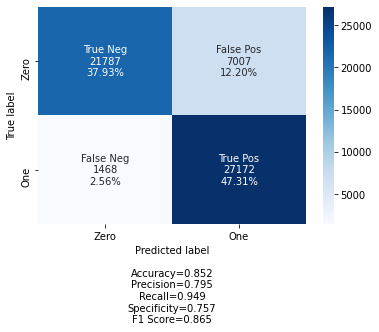

In [103]:
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')



## SVM Tuning <a name="svm"></a>

In [24]:
X = X_sm
y = y_sm

In [25]:
#  Split 10% of data for training.  Set seed '42' for comparative training results.
from sklearn.model_selection import train_test_split
X_train, X_test1, y_train, y_test1 = train_test_split(X, y, test_size=0.90, random_state=42)

In [26]:
#Split 10 % of data for testing.  Set seed for 591 to obtain unique test data.

from sklearn.model_selection import train_test_split
X_train2, X_test, y_train2, y_test = train_test_split(X, y, test_size=0.10, random_state=591)

In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [31]:
%%time
# Case study 8 - linear SVM to expedite testing with minimal time.  Loop thru hyperparameter value 'C'.  
# Print confusion matrices and Accuracy scores

for i in [.001,.01,.1,1,10,100]:
    from sklearn.svm import LinearSVC
    svm = LinearSVC(verbose=True,dual=False,C=i,class_weight='balanced')
    svm.fit(X_train,y_train)
    print("done i = ", i)
    preds=svm.predict(X_test)
    cf_matrix = confusion_matrix(y_test, preds)
    print(accuracy_score(y_test, preds))
    print(confusion_matrix(y_test, preds))
    

[LibLinear]done i =  0.001
0.8434932490663603
[[6291 2376]
 [ 348 8390]]
[LibLinear]done i =  0.01
0.8443550703820741
[[6174 2493]
 [ 216 8522]]
[LibLinear]done i =  0.1
0.8450445274346452
[[6164 2503]
 [ 194 8544]]
[LibLinear]done i =  1
0.84596380350474
[[6158 2509]
 [ 172 8566]]
[LibLinear]done i =  10
0.8431485205400747
[[6176 2491]
 [ 239 8499]]
[LibLinear]done i =  100
0.8445274346452168
[[6177 2490]
 [ 216 8522]]
Wall time: 15.9 s


In [32]:
#  Full train/test split.  Use for final run from optimal linear SVM C hyperparameter.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [33]:
%%time
#Linear SVM with full train/test split data

from sklearn.svm import LinearSVC
svm = LinearSVC(verbose=True,dual=False,C=0.1)
svm.fit(X_train,y_train)
preds=svm.predict(X_test)
cf_matrix = confusion_matrix(y_test, preds)
print(accuracy_score(y_test, preds))
print(confusion_matrix(y_test, preds))

[LibLinear]0.8453181042588014
[[20397  8397]
 [  487 28153]]
Wall time: 28.1 s


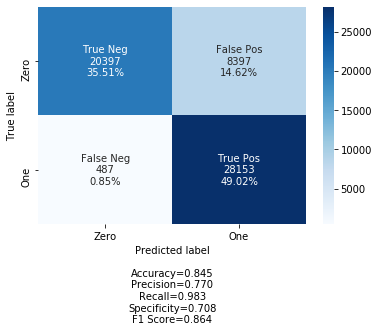

In [36]:
# confusion matrix for full SVM run
labels=['True Neg', 'False Pos', 'False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix,
                     group_names=labels,
                     categories=categories,
                     cmap='Blues')

In [37]:
from sklearn.model_selection import train_test_split
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.33, random_state=42)

In [39]:
#  time scale analysis using doubling training data populations

from time import time
for i in [1000,2000,5000,10000]:
    start = time()
    X_train = X_train3.iloc[0:i, :]
    y_train = y_train3[0:i]
    X_test = X_train3.iloc[i+1:i+i+1, :]
    y_test = y_train3[i+1:i+i+1]
    from sklearn.svm import LinearSVC
    svm = LinearSVC(verbose=True,dual=False,C=0.1,class_weight='balanced')
    svm.fit(X_train,y_train)
    preds=svm.predict(X_test)
    cf_matrix = confusion_matrix(y_test, preds)
    print(accuracy_score(y_test, preds))
    print(confusion_matrix(y_test, preds))
    print("LinearSVC took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), i))

[LibLinear]

LinearSVC(C=0.1, class_weight='balanced', dual=False, verbose=True)

0.81
[[401 115]
 [ 75 409]]
LinearSVC took 0.19 seconds for 1000 candidates parameter settings.
[LibLinear]

LinearSVC(C=0.1, class_weight='balanced', dual=False, verbose=True)

0.8285
[[745 246]
 [ 97 912]]
LinearSVC took 0.26 seconds for 2000 candidates parameter settings.
[LibLinear]

LinearSVC(C=0.1, class_weight='balanced', dual=False, verbose=True)

0.8302
[[1805  696]
 [ 153 2346]]
LinearSVC took 0.46 seconds for 5000 candidates parameter settings.
[LibLinear]

LinearSVC(C=0.1, class_weight='balanced', dual=False, verbose=True)

0.8419
[[3594 1445]
 [ 136 4825]]
LinearSVC took 2.64 seconds for 10000 candidates parameter settings.


In [40]:

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# Extra experiments using randomizesearch CV
from sklearn.svm import SVC

# build a classifier
#clf = SGDClassifier(loss='hinge', penalty='elasticnet',
#                   fit_intercept=True)
svm = SVC(verbose=True, class_weight="balanced", cache_size=2000)


# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

kern = ["poly", "rbf"]
i = [.01,.1,10]
degree = [2, 3]

# specify parameters and distributions to sample from
param_dist = {'kernel': kern,
              'C':i, 
              'degree': degree
             }



# run randomized search
n_iter_search = 5
random_search = RandomizedSearchCV(svm, param_distributions=param_dist,
                                   n_iter=n_iter_search)




In [41]:
start = time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

RandomizedSearchCV(estimator=SVC(cache_size=2000, class_weight='balanced',
                                 verbose=True),
                   n_iter=5,
                   param_distributions={'C': [0.01, 0.1, 10], 'degree': [2, 3],
                                        'kernel': ['poly', 'rbf']})

RandomizedSearchCV took 813.42 seconds for 5 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.498 (std: 0.013)
Parameters: {'kernel': 'poly', 'degree': 3, 'C': 0.01}

Model with rank: 2
Mean validation score: 0.498 (std: 0.009)
Parameters: {'kernel': 'rbf', 'degree': 2, 'C': 10}

Model with rank: 3
Mean validation score: 0.497 (std: 0.000)
Parameters: {'kernel': 'rbf', 'degree': 2, 'C': 0.01}

Model with rank: 3
Mean validation score: 0.497 (std: 0.000)
Parameters: {'kernel': 'rbf', 'degree': 3, 'C': 0.01}



In [42]:
# produce confusion matrix from the randomizedCV
preds=random_search.predict(X_test)
cf_matrix = confusion_matrix(y_test, preds)
print(accuracy_score(y_test, preds))
print(confusion_matrix(y_test, preds))


0.4973
[[3983 1056]
 [3971  990]]
